In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

In [7]:

plt.rcParams['figure.figsize'] = (8, 4)

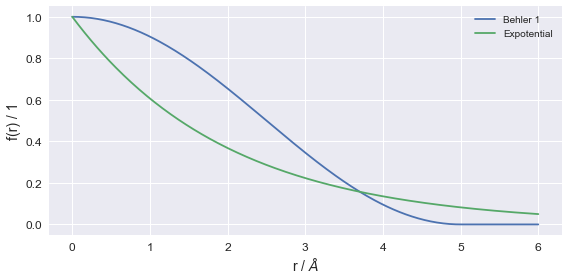

In [15]:
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

t = np.linspace(0, 6, 300)
R_c = 5
tau = 2

plt.plot(t, behler_cutoff_1(t, R_c), label="Behler 1")
plt.plot(t, np.exp(-t/tau), label="Expotential")

plt.xlabel("r / $\AA$")
plt.ylabel("f(r) / 1")

plt.legend()
plt.tight_layout()

plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/CutOffs.pdf")


# Gaussians Mit CutOff

In [18]:
def plot_normal_model(model, t):
    for r_s, eta in zip(model[0], model[1]):
        plt.plot(t, np.exp(-1 * eta*(t - r_s)**2))
        
def plot_cutoff_model(model, R_c, t=None):
    mus, sigmas = model
    
    if t is None:
        t = np.linspace(0, 1.2 * R_c, 200)
    
    for r_s, eta in zip(mus, sigmas):
        plt.plot(
            t, 
            np.exp(-1 * eta*(t - r_s)**2) * \
            behler_cutoff_1(t, R_c)
        )

def plot_damped_model(model, tau, t=None):
    mus, sigmas = model
    
    if t is None:
        t = np.linspace(0, 1.2 * tau, 200)
    
    for r_s, eta in zip(mus, sigmas):
        plt.plot(
            t, 
            np.exp(-1 * eta*(t - r_s)**2) * \
            np.exp(- t / tau)
        )

In [39]:
model = (
    np.arange(1,11)*0.5,
    [5] * 10,
)

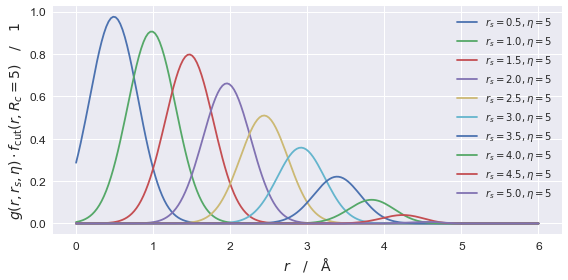

In [60]:
R_c = 5
t = np.linspace(0, 1.2 * R_c, 200)

for r_s, eta in zip(model[0], model[1]):
    plt.plot(
        t, 
        np.exp(-1 * eta*(t - r_s)**2) * \
        behler_cutoff_1(t, R_c),
        label="$r_s={0}, \eta={1}$".format(r_s, eta)
    )

plt.legend()
plt.ylabel("$g(r, r_s, \eta) \cdot f_{\mathrm{cut}}(r, R_c=5)\quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")
plt.tight_layout()

plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/GaussiansCutOff.pdf")
